In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [48]:
import random

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [40]:
def place_mines_probability(w, h, n_mines):
    board = np.zeros((w, h))
    cells = float(len(board)**2)
    n_mines = float(n_mines)
    length = board.shape[0]
    width = board.shape[1]
    for i in range(0, length):
        for j in range(0,width):
            prob = n_mines / cells
            choice = random.uniform(0,1.) < prob
            if choice: #it's a mine
                board[i,j] = 1
                n_mines -= 1
                if n_mines <= 0: #no point going on if there are no more mines left
                    return board
            cells -= 1
    return board

In [41]:
b = place_mines_probability(9, 9, 5)

In [42]:
np.argwhere(b)

array([[1, 6],
       [1, 8],
       [5, 4],
       [6, 3],
       [6, 6]])

In [22]:
b

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])

Average should be: 0.741


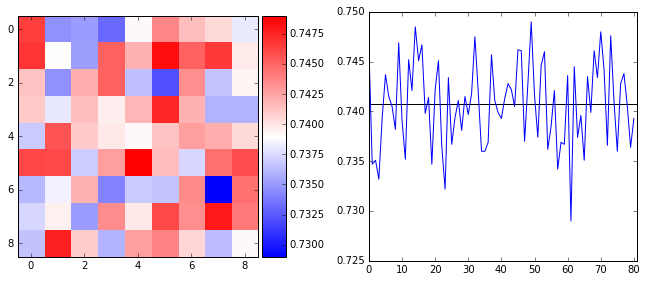

In [58]:
b = np.zeros((9, 9))
N = 10000
n_mines = 60
for n in range(N):
    b += place_mines_probability(*b.shape, n_mines)
    
b /= N

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9.1,4))

im = ax1.imshow(b, interpolation='nearest', cmap=plt.cm.bwr)
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="10%", pad=0.05)
plt.colorbar(im, cax=cax1)

average = n_mines/float(b.shape[0]*b.shape[1])
ax2.hlines(average, xmin=0, xmax=b.shape[0]*b.shape[1])
ax2.plot(b.ravel())
ax2.set_xlim(0, b.shape[0]*b.shape[1])

f.tight_layout()

print('Average should be: %.3f'%(average))